In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils import np_utils
from preprocessors import x_cord_contour, makeSquare, resize_to_pixel

import cv2

from keras.utils import plot_model
import matplotlib.image as mpimg

Using TensorFlow backend.


In [2]:
# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

In [3]:
# Number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

In [4]:
# original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [5]:
# shape of a single image 
input_shape = (img_rows, img_cols, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255.
x_test /= 255.

In [7]:
# Now we one hot encode outputs
y_train_oh = np_utils.to_categorical(y_train)
y_test_oh = np_utils.to_categorical(y_test)

In [8]:
num_classes= y_test_oh.shape[1]
print ("Number of Classes: " + str(num_classes))

Number of Classes: 10


### LeNet

In [9]:
def lenet():
# create model
    model = Sequential([

    # 2 sets of CRP (Convolution, RELU, Pooling)
    Conv2D(20, (5, 5), activation='relu', padding = "same", input_shape = input_shape),
    MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

    Conv2D(50, (5, 5), activation='relu', padding = "same"),
    MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

    # Fully connected layers (w/ RELU)
    Flatten(),
    Dense(500,activation='relu'),

    # Softmax (for classification)
    Dense(num_classes,activation='softmax'),
    ])
    return model

In [10]:
# Training Parameters
batch_size = 128
epochs = 10
adam = Adam(lr=0.001)

In [11]:
model = lenet()
model.compile(loss = 'categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])

In [12]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1225500   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
Total para

### Training LeNet

In [13]:
history = model.fit(x_train, y_train_oh,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test_oh))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.1612 - acc: 0.9514 - val_loss: 0.0756 - val_acc: 0.9767
Epoch 2/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.0413 - acc: 0.9876 - val_loss: 0.0390 - val_acc: 0.9865
Epoch 3/10
60000/60000 [==============================] - 12s 207us/step - loss: 0.0276 - acc: 0.9910 - val_loss: 0.0318 - val_acc: 0.9890
Epoch 4/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.0210 - acc: 0.9936 - val_loss: 0.0337 - val_acc: 0.9894
Epoch 5/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.0161 - acc: 0.9950 - val_loss: 0.0315 - val_acc: 0.9900
Epoch 6/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.0116 - acc: 0.9962 - val_loss: 0.0286 - val_acc: 0.9903
Epoch 7/10
60000/60000 [==============================] - 13s 224us/step - loss: 0.0092 - acc: 0.9970 - val_loss: 0.

In [14]:
scores = model.evaluate(x_test, y_test_oh, batch_size=256, verbose=1)
print('\nTest result: %.3f loss: %.3f' %(scores[1]*100,scores[0]))

10000/10000 [==============================] - 1s 63us/step

Test result: 99.070 loss: 0.031


In [15]:
model.save('mnist_lenet.h5')

In [16]:
y_pred = model.predict(x_test)

In [17]:
y_pred_label = np.argmax(y_pred, axis=1)

In [18]:
labels = {0: "0",
          1: "1",
          2: "2",
          3: "3",
          4: "4",
          5: "5",
          6: "6",
          7: "7",
          8: "8",
          9: "9"}

## Confusion Matrix

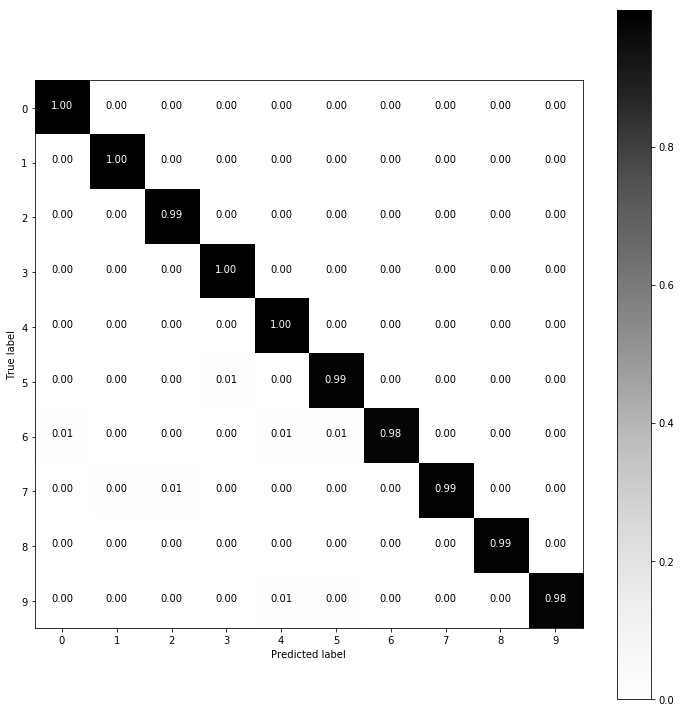

In [19]:
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_label)
cm = cnf_matrix.astype('float32')/cnf_matrix.sum(axis=1)
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greys)
tick_marks = np.arange(10)
plt.xticks(tick_marks, [labels[i] for i in range(10)])
plt.yticks(tick_marks, [labels[i] for i in range(10)])
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid(False)
plt.show();

## Training, Validation Plots

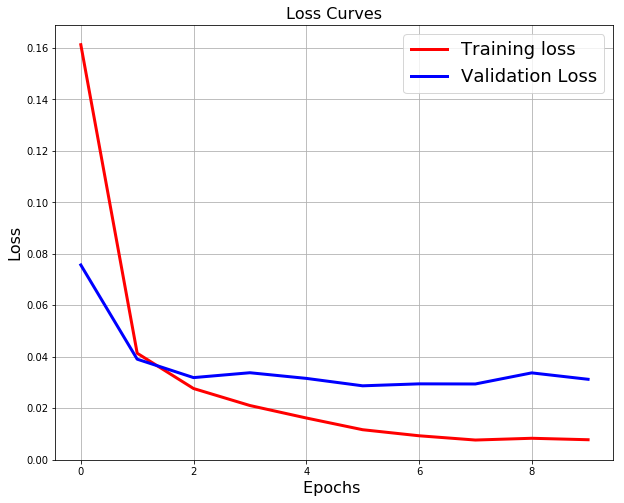

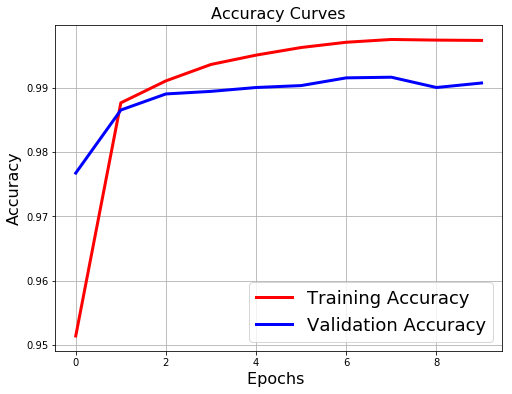

In [20]:
# Loss Curves
plt.figure(figsize=[10,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.grid()
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.grid()
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16);


# Testing MNIST Model

In [21]:
classifier = load_model('mnist_lenet.h5')

def draw_test(name, pred, input_im):
    # For Black Background
    BLACK = [0,0,0] 
    # For Border
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK) 
    # Convert image to BGR
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR) 
    # To display image and Prediction Text
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2) 
    cv2.imshow(name, expanded_image)

for i in range(0,10):
    # Random 10 images from test dataset
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    
    #Resize test image 
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC) 
    input_im = input_im.reshape(1,28,28,1) 
    
    # Get Prediction on model
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])
    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

<img src="no. 2,6,4.png">

### Testing our classifier on real image

In [22]:
image = cv2.imread('images/numbers.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow("image", image)
cv2.waitKey(0)

# Blur image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Find edges
edged = cv2.Canny(blurred, 30, 150)

# Find Contours
_,contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Sort out contours left to right by using their x cordinates
contours = sorted(contours, key = x_cord_contour, reverse = False)

# Create empty array to store entire number
full_number = []

    # loop over the contours
for c in contours:
    # compute the bounding box for the rectangle
    (x, y, w, h) = cv2.boundingRect(c)    

    if w >= 5 and h >= 25:
        roi = blurred[y:y + h, x:x + w]
        ret, roi = cv2.threshold(roi, 127, 255,cv2.THRESH_BINARY_INV)
        roi = makeSquare(roi)
        roi = resize_to_pixel(28, roi)
        cv2.imshow("ROI", roi)
        roi = roi / 255.    
        roi = roi.reshape(1,28,28,1) 

        ## Get Prediction
        res = str(classifier.predict_classes(roi, 1, verbose = 0)[0])
        full_number.append(res)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(image, res, (x , y + 155), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2)
        cv2.imshow("image", image)
    cv2.waitKey(0) 

cv2.destroyAllWindows()
print ("The number is: " + ''.join(full_number))

The number is: 13540


<img src="numbers_check.png">

## Generating the diagram of the model 

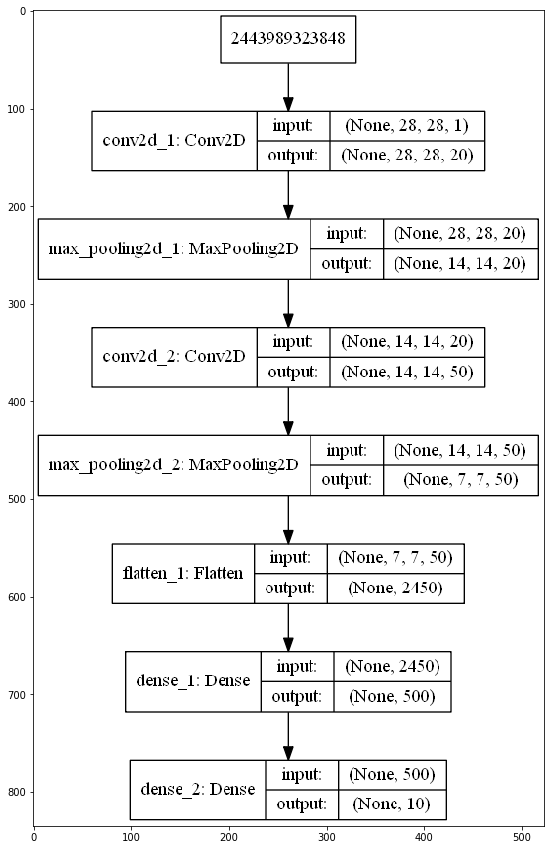

In [23]:
# Generate the plot
plot_model(model, to_file ='model_plot_lenet.png',
           show_shapes = True,
           show_layer_names = True)

# Show the plot here
img = mpimg.imread('model_plot_lenet.png')
plt.figure(figsize=(30,15))
imgplot = plt.imshow(img) 